In [1]:
from cobaya.yaml import yaml_load_file
import getdist.plots as gdplt
import getdist

from cobaya import load_samples
import numpy as np
%matplotlib inline 

['omega_scf', 'omega_cdm', 'h', 'omega_b', 'logA', 'n_s', 'b1_ngc_z1', 'b1_sgc_z1', 'b1_ngc_z3', 'b1_sgc_z3', 'Omega_scf', 'm_axion', 'kJ0p5', 'A_s', 'chi2', 'chi2__pbjboss']


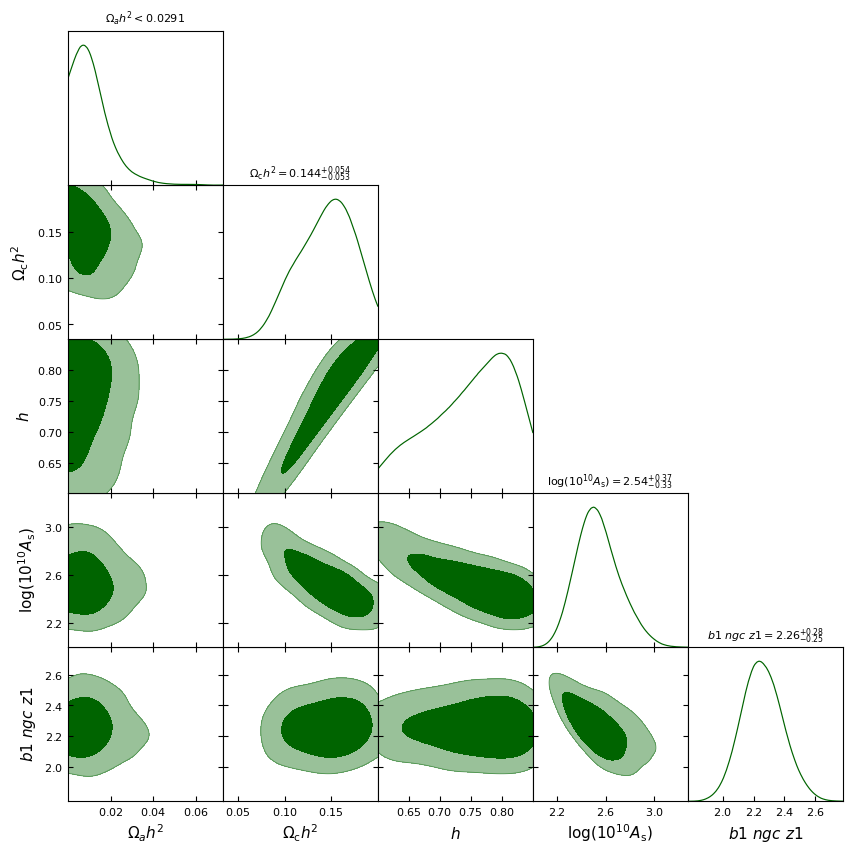

In [2]:
chain1 = load_samples('/home/fverdian/cobaya/chains/Axi25_CPTcount/chain', to_getdist=True)
print([pn.name for pn in chain1.paramNames.names])
pars_toplot =['omega_scf','omega_cdm','h','logA','b1_ngc_z1']

gdplot = gdplt.get_subplot_plotter()
gdplot.settings.linewidth=1.5
gdplot.settings.legend_fontsize=15

gdplot.triangle_plot([  chain1],  pars_toplot, contour_colors=['darkgreen','orangered','r','purple'], title_limit=2, filled=True)


In [2]:
boss_full = load_samples('/home/fverdian/cobaya/chains-buone/pbjboss_full/full', to_getdist=True)
boss_full.label='BOSS EFT'
print([pn.name for pn in boss_full.paramNames.names])

boss_planck = load_samples('/home/fverdian/cobaya/chains-ulysses/boss_planck_withnu/bpnu', to_getdist=True)
boss_planck.label='Planck + BOSS'

['h', 'omega_b', 'omega_cdm', 'logA', 'n_s', 'b1_ngc_z1', 'b1_sgc_z1', 'b1_ngc_z3', 'b1_sgc_z3', 'b2_ngc_z1', 'b2_sgc_z1', 'b2_ngc_z3', 'b2_sgc_z3', 'bG2_ngc_z1', 'bG2_sgc_z1', 'bG2_ngc_z3', 'bG2_sgc_z3', 'A_s', 'minuslogprior', 'minuslogprior__0', 'chi2', 'chi2__pbjboss']


In [4]:
chain_to_analyze = '/home/fverdian/cobaya/chains-ulysses/axi_nativelens/base_m25/BOSS+planck/base_m25_BOSS+planck'
chainraw = np.loadtxt(chain_to_analyze+'.1.txt')
print(chainraw[0,-1])
idxMaxLP = np.argmax(chainraw[:,1])
chaingetdist = load_samples(chain_to_analyze, to_getdist=True)
parkeys = [pn.name for pn in chaingetdist.paramNames.names]
print('bestfit')
print(dict(zip(parkeys,chainraw[idxMaxLP,2:]))) #jump the first two values, weight and lkl
print('means')
print(dict(zip(parkeys,chaingetdist.getMeans())))
# paramvals = 
# print(chainraw[idxMaxLP,1])
# print()



700.08942
bestfit
{'b2_ngc_z1': -2.1926661, 'b2_sgc_z1': -0.94204699, 'b2_ngc_z3': -1.0388852, 'b2_sgc_z3': -2.687502, 'bG2_ngc_z1': 0.081510174, 'bG2_sgc_z1': 0.9897621, 'bG2_ngc_z3': 0.19004925, 'bG2_sgc_z3': 0.67193883, 'omega_scf': 0.0027969376, 'omega_cdm': 0.11768787, 'logA': 3.0558493, 'n_s': 0.96405678, 'h': 0.6787778, 'omega_b': 0.022797685, 'tau_reio': 0.057118721, 'A_planck': 1.0018119, 'b1_ngc_z1': 1.7992687, 'b1_sgc_z1': 1.7910361, 'b1_ngc_z3': 1.9316844, 'b1_sgc_z3': 2.0131971, 'kJ0p5': 2.5019454, 'Omega_scf': 0.0060705428, 'm_axion': 68892339.0, 'A_s': 2.1239215e-09, 'chi2__CMB': 1037.0479, 'minuslogprior': -4.0130453, 'minuslogprior__0': -4.0130453, 'chi2': 1737.1374, 'chi2__planck_2018_lowl.TT': 24.112058, 'chi2__planck_2018_lowl.EE': 396.63609, 'chi2__planck_2018_highl_plik.TTTEEE_lite_native': 607.59768, 'chi2__planck_2018_lensing.native': 8.7021217, 'chi2__pbjboss': 700.08942}
means
{'b2_ngc_z1': -1.3337067841034842, 'b2_sgc_z1': -0.9161687854125073, 'b2_ngc_z3': -1

In [4]:
parkeys = [pn.name for pn in chaingetdist.paramNames.names]

print(dict(zip(parkeys,chaingetdist.getMeans())))

{'omega_scf': 0.001227124661546977, 'omega_cdm': 0.12823474613680158, 'h': 0.6915100411695568, 'omega_b': 0.022678376108092493, 'logA': 2.704666284007708, 'b1_ngc_z1': 2.213306813082852, 'b1_sgc_z1': 2.256415680944124, 'b1_ngc_z3': 2.363475066897881, 'b1_sgc_z3': 2.4897910144701356, 'Omega_scf': 0.0025509214673252937, 'm_axion': 676433.0654142585, 'kJ0p5': 0.2479072297495184, 'A_s': 1.5016069201541425e-09, 'minuslogprior': -10.752432624547207, 'minuslogprior__0': -10.752432624547207, 'chi2': 694.2013816763007, 'chi2__pbjboss': 694.2013816763007}


['h', 'omega_b', 'omega_cdm', 'logA', 'b1_ngc_z1', 'b1_sgc_z1', 'b1_ngc_z3', 'b1_sgc_z3', 'A_s', 'minuslogprior', 'minuslogprior__0', 'chi2', 'chi2__pbjboss']


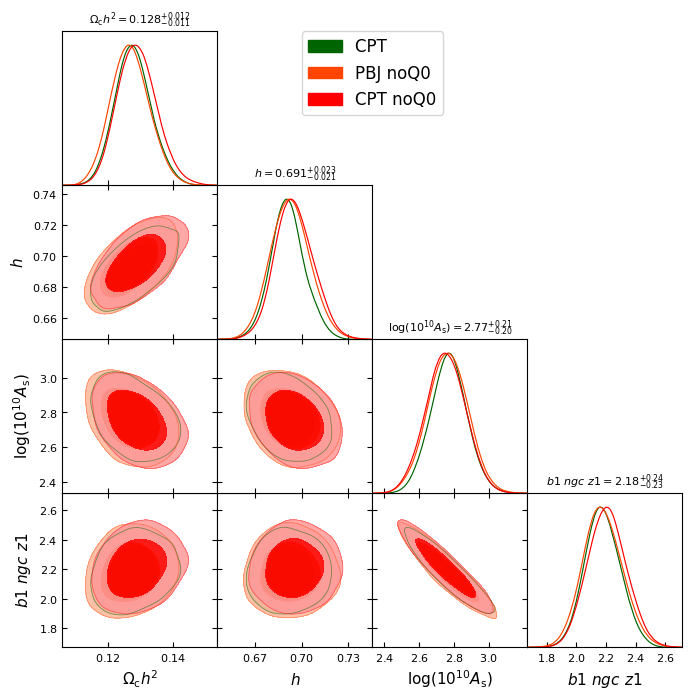

In [9]:
# p=chain1.getParams()
# boss_fx.addDerived(p.omega_chi*93.14, name='M', label=r'Mnu', range=[0.,None])
print([pn.name for pn in chain1.paramNames.names])
parlabs = [pn.name for pn in chain1.paramNames.names]

chain2 = load_samples('/home/fverdian/cobaya/chains/testPBJcounts_noP4Q0/chain', to_getdist=True)
chain2.label=r'PBJ noQ0'

chain3 = load_samples('/home/fverdian/cobaya/chains/testCPTcounts_noP4Q0/chain', to_getdist=True)
chain3.label=r'CPT noQ0'

chain1 = load_samples('/home/fverdian/cobaya/chains/testCPTcounts/chain', to_getdist=True)
chain1.label=r'CPT '

pars_toplot =['omega_cdm','h','logA','b1_ngc_z1']

gdplot = gdplt.get_subplot_plotter()
gdplot.settings.linewidth=1.5
gdplot.settings.legend_fontsize=15

gdplot.triangle_plot([chain1, chain2, chain3],  pars_toplot, contour_colors=['darkgreen','orangered','r','purple'], title_limit=2, filled=True)
# gdplot.finish_plot(no_tight=True)

In [13]:
# gdplot.fig.savefig('/home/fverdian/cobaya/chains-ulysses/AxiTests_br_Q0/with_and_without_br.pdf', bbox_inches='tight')

---
plot boss Ivanov Phylcox

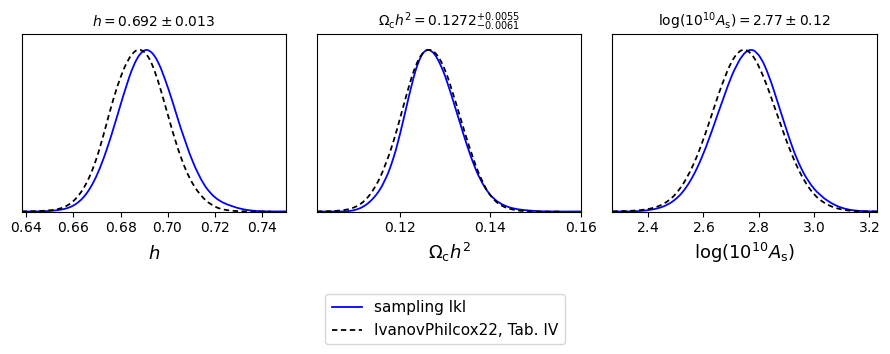

In [10]:
cosmolist=['h', 'omega_cdm', 'logA', 'n_s']
means=[0.688, 0.1268, 2.75,0.9649]
cov = np.diag(np.array([ 0.012, 0.0062, 0.12,0.0042])**2)

parlabels= ['h','\Omega_c h^2',  '\log{10^{10} A_s}', 'n_s']
ivphyl = getdist.MCSamples(samples = np.random.multivariate_normal(means, cov, 10000) ,
                        label='IvanovPhilcox22, Tab. IV',
                        names = cosmolist,
                        labels=parlabels,
                        ranges={'Mnu':[0.001,0.2],'Ombh2':[0.0216,None]})

gdplot = gdplt.get_subplot_plotter(subplot_size=3)
gdplot.settings.linewidth=1.5
gdplot.settings.subplot_size_ratio=0.95
gdplot.settings.figure_legend_loc='lower center'

gdplot.plots_1d([boss_b1, ivphyl],  pars_toplot, colors=['b','k'], nx=3,  title_limit=1, legend_ncol=1 ,ls=['-','--'])
gdplot.finish_plot()
# gdplot.fig.savefig('/home/fverdian/cobaya/chains/pbjboss_full/pbjboss_ivphyl.pdf')


---
CMB

In [5]:

cmb1 = load_samples('/home/fverdian/cobaya/chains/planck_cosmopower/planck', to_getdist=True)
cmb1.label='cosmopower'
cmb_camb = load_samples('/home/fverdian/cobaya/chains-buone/planck_camb/planck', to_getdist=True)
cmb_camb.label='camb'
cmb_class = load_samples('/home/fverdian/cobaya/chains-buone/planck_class/planck', to_getdist=True)
cmb_class.label='Planck (CLASS)'
print([pn.name for pn in cmb_class.paramNames.names])


['logA', 'n_s', 'h', 'omega_b', 'omega_cdm', 'tau_reio', 'A_planck', 'A_s', 'chi2__CMB', 'minuslogprior', 'minuslogprior__0', 'chi2', 'chi2__planck_2018_lowl.TT', 'chi2__planck_2018_lowl.EE', 'chi2__planck_2018_highl_plik.TTTEEE_lite_native']


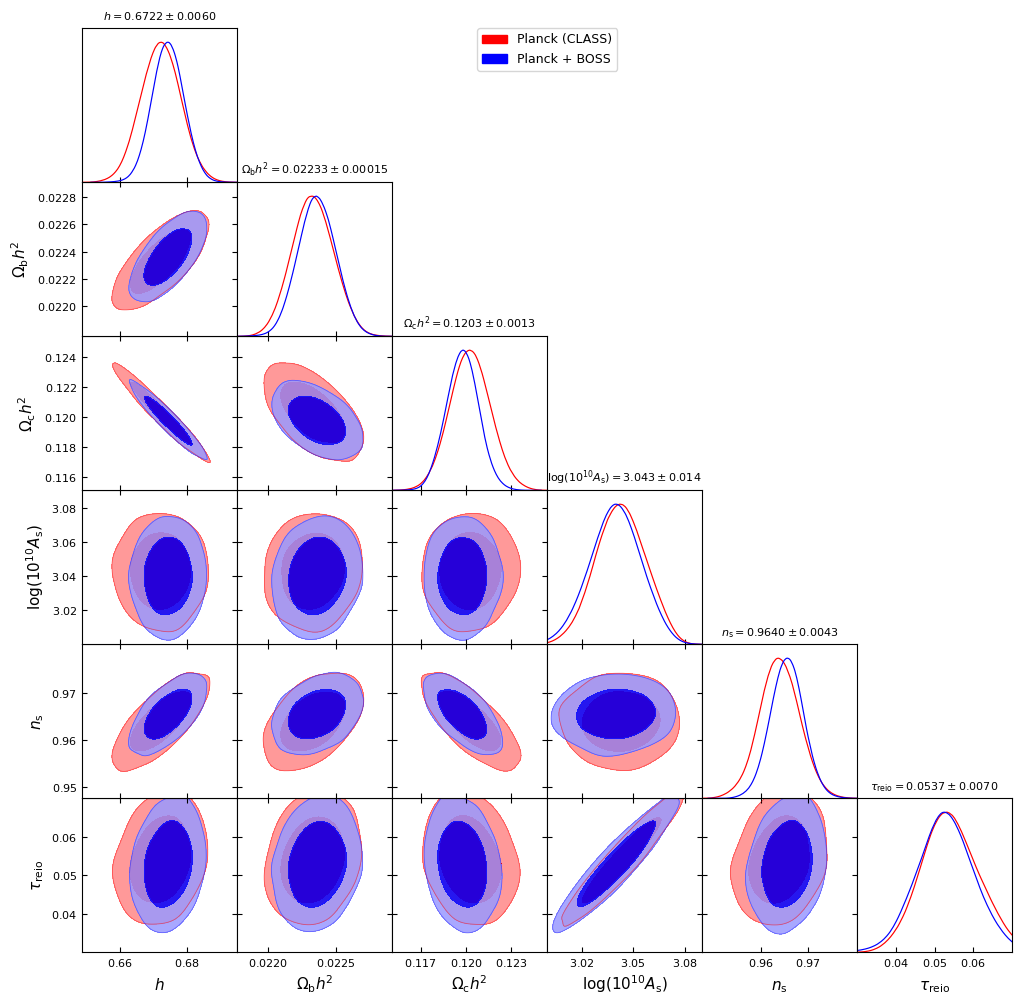

In [6]:
%matplotlib inline 
pars_toplot = ['h','omega_b','omega_cdm','logA', 'n_s', 'tau_reio']
gdplot = gdplt.get_subplot_plotter()
gdplot.settings.linewidth=1.5
gdplot.triangle_plot([cmb_class, boss_planck], pars_toplot, contour_colors=['r','b'],filled=True, title_limit=1)


----
test with corner

95% upper limit for omega_a: 0.09263675259999997
95% upper limit for omega_cdm: 0.118377608


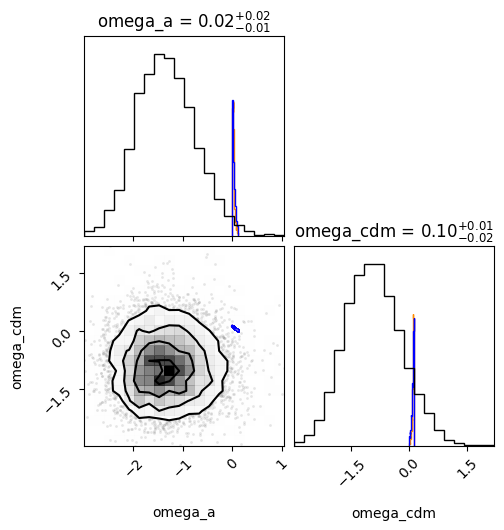

In [7]:
parlabs = ['omega_a', 'omega_cdm', 'logA', 'n_s', 'h', 'omega_b', 'tau_reio', 'A_planck', 'Omega_scf', 'm_axion', 'A_s', 'chi2__CMB', 'minuslogprior', 'minuslogprior__0', 'chi2', 'chi2__planck_2018_lowl.TT', 'chi2__planck_2018_lowl.EE', 'chi2__planck_2018_highl_plik.TTTEEE_lite_native', 'chi2__planckpr4lensing']


import corner
figure = corner.corner(
    chain1.samples[:,:2],
    labels=parlabs[:2],
    show_titles=True,
    color = 'darkorange',
    title_kwargs={"fontsize": 12},
)
corner.corner(
    chain2.samples[:,:2],
    fig = figure,
    color='b'
)
corner.corner(
    chain3.samples[:,:2],
    fig = figure,
    color='k'
)
upper_limits = np.percentile(chain2.samples[:,:2], 95, axis=0)

# Print the 95% upper limits
for label, upper_limit in zip(parlabs[:2], upper_limits):
    print(f"95% upper limit for {label}: {upper_limit}")

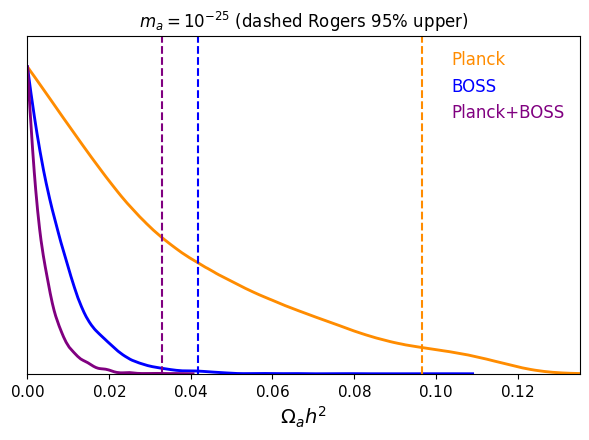

In [58]:
gdplot = gdplt.get_single_plotter()
gdplot.settings.linewidth=1.2
gdplot.settings.fig_width_inch=1.
# gdplot.settings.figure_legend_loc='lower center '

gdplot.plot_1d([chain1, chain2, chain3],  'omega_scf', colors=['darkorange','b','purple'], nx=3,  title_limit=None, legend_ncol=1)

gdplot.get_axes().axvline(0.09667, color='darkorange', ls='--')
gdplot.get_axes().axvline(0.04174, color='b', ls='--')
gdplot.get_axes().axvline(0.03306, color='purple', ls='--')

gdplot.add_legend(['Planck', 'BOSS', 'Planck+BOSS'], colored_text=True)
gdplot.get_axes().set_title(r'$m_a=10^{-25}$ (dashed Rogers 95% upper)')
gdplot.finish_plot()